# Régression Linéaire from scratch

Nous allons recoder la régression linéaire 

## Imports

In [14]:
import numpy as np 
from sklearn.datasets import make_regression #pour créer un dataset
import matplotlib.pyplot as plt

## Dataset

- **Dataset** : *(x,y)* avec *m* (lignes) exemples, et *n* (colonne) variable

In [15]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
                    # n_exemples=100, n_variable=1, ajout de bruit  

Text(0, 0.5, 'axe des Y')

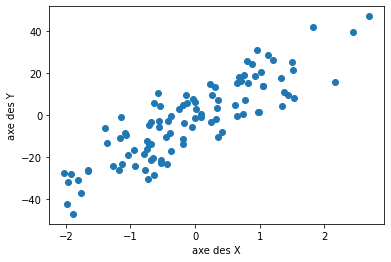

In [16]:
plt.scatter(x, y)

plt.xlabel("axe des X")
plt.ylabel("axe des Y")

### Matrices
-  Vérifier les dimensions des matrices ... toujours !

In [17]:
x.shape, y.shape


((100, 1), (100,))

- Nous allons redimensionner *y*, car parfois comme ici il n'affiche pas les dimensions lorsqu'il n'y a qu'une colonne.  

In [18]:
y = y.reshape(y.shape[0], 1)

x.shape, y.shape

((100, 1), (100, 1))

#### Ajouter une colonne de *Biais* à notre matrice de *x*
Ce que nous voulons obtenir : 
$$\begin{bmatrix} x & 1 \\
\ x^{(i)} & 1\\
\vdots & \vdots\\
\ x^{(m)} & 1\\
\end{bmatrix}$$

- pour créer notre Matrice *X* nous allons rajouter 1 colonne de Biais à notre matrice *x*

In [19]:
# matrice X
X = np.hstack((x, np.ones(x.shape)))
    # np.hstack permet de coller 2 vecteurs côte à côte

In [20]:
X.shape

(100, 2)

Nous avons bien ajouté 1 colonne de Biais (1) à notre matrice X

In [32]:
# affiche les 5 premières lignes
X[:5, :]

array([[-0.6426534 ,  1.        ],
       [ 1.02600613,  1.        ],
       [ 0.32340104,  1.        ],
       [ 0.09453971,  1.        ],
       [ 0.88578536,  1.        ]])

### Initialisation des Paramètres 
Notre modéle de Régression est linéaire il aura donc 2 paramètres, a et b
il seront contenue dans la matrice *theta*

In [49]:
# 2 élem, a et b, 2 lignes(m) et 1 colonne(n)
param_theta = np.random.randn(2, 1)

In [36]:
param_theta.shape

(2, 1)

In [50]:
param_theta

array([[ 0.35396518],
       [-0.44057919]])

## Le Modèle 
**La régréssion linéaire**

> Notre modèle : $$f(x) = ax + b$$

> Sous forme matriciel : $$F = X.\theta$$

- Définie notre modèle dans une fct

In [38]:
def model(X, param):
    
    return X.dot(param)

- On peut ensuite l'appliquer à nos données 

Text(0, 0.5, 'axe des Y')

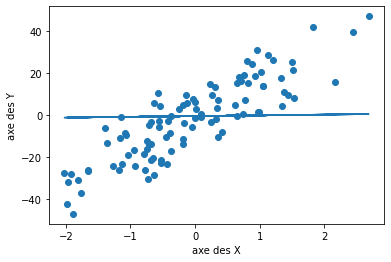

In [51]:
# nuage de point de nos données
plt.scatter(x, y)

# Notre modèle avec des paramètres aléatoires
plt.plot(x, model(X, param_theta))

plt.xlabel("axe des X")
plt.ylabel("axe des Y")

## La fonction Coût

> Fonction coût : $$J(a,b) = \frac{1}{2m} \sum_{i=1}^{m} (a.x^{(i)} -y^{(i)})^2$$
> Fonction coût sous forme matriciel : $$J(\theta) = \frac{1}{2m} \sum (X.\theta - Y)^2$$
  
 Ou *m* (ligne) le nb d'exemple dans le dataset

- Écrivons sous forme de code notre fonction de coût

In [54]:
def cost_function(X, y, param):
    
    m = len(y) # ici 100 exemple dans notre dataset
    
    return 1/(2*m) * np.sum((model(X, param) -y)**2)
    

- On veut que cette fct tende vers zéro ...

In [55]:
cost_function(X, y, param_theta)

173.32570756272838

Ce n'est pas le cas, nous allons passer au calcule des gradients et à leur descente pour réduire le coût.

## Calcules des Gradients

> Sous forme matriciel : 
$$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^{T}.(X.\theta - Y)$$

In [57]:
def grad(X, y, param):
    m = len(y)
    
    return 1/m * X.T.dot(model(X, param) - y)

## Descente de Gradient

> Descente de Gradient sous forme matriciel$$\theta := \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}$$

Ou *alpha* le Learning Rate 

In [96]:
def gradient_descent(X, y, param, learning_rate, n_iter):
    """ Descente de gradient pour minimiser la fct coût, 
    calcule des gradients et converge vers le minimum de la fct coût avec un pas alpha.
    
    Paramètres:
        X (np.array): Matrice du dataset, m exemples, n variables, 1 colonne de biais
        y (np.array): Vecteur de notre variable à prédire
        param (np.array): Vecteur des paramètres de notre modèle à améliorer ici
        learning_rate (int) : Valeur multiplier par le gradient, 
                            définit la vitesse de la descente de gradient 
        n_iter (int) : Nombre d'itérations de notre calcule et descente de gradient
        
    retours: 
        param (np.array) : vecteur des Parammètres de notre modèle entrainer
        cost_history (np.array) : vecteur de résultats du calcule de la fonction coût
                            pour chaque itérations de la descente de gradient 
        
    """
    # varb pour stocker les resultats de la fct coût à chaque iteration de la descente de grad
    cost_history = np.zeros(n_iter)

    for i in range(0, n_iter):
        param = param - learning_rate * grad(X, y, param)
        
        # ajoute le res du calcule de la fct coût
        cost_history[i] = cost_function(X, y, param)    
        
    return param, cost_history     

Nous retournons dans cette fonction *param* qui sont les paramètres de notre modèle maintenant entrainé

## Entrainement 
Il faut maintenant, faire passer nos paramètres $\theta$ obtenues aléatoirement avec notre modèle initial, dans notre fct Descente de Gradient pour améliorer nos prédictions et réduire la fct coût 

In [114]:
param_theta_final, cost_history = gradient_descent(X, y, param_theta, learning_rate=0.01, n_iter=100)

- Voici les param obtenue après notre 1er entrainement 

In [115]:
param_theta_final

array([[10.55800638],
       [-1.1898022 ]])

- Pour les afficher on les passe dans notre Modèle et on mets dans un vecteur *predictions* 

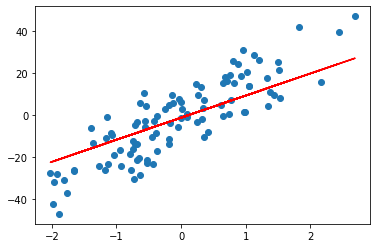

In [116]:
predictions = model(X, param_theta_final)

plt.scatter(x, y)
plt.plot(x, predictions, c='r')


In [73]:
cost_function(X, y, param_theta_final)

58.83625836900665

### 2ème Entrainement en changeant les hyper-paramètres
On augmente le nombre d'itérations

In [101]:
param_theta_final_two, cost_history_two = gradient_descent(X, y, param_theta, learning_rate=0.01, n_iter=700)

- Voici les param obtenue après notre 1er entrainement 

In [102]:
param_theta_final_two

array([[15.69270093],
       [-1.01991358]])

- Pour les afficher on les passe dans notre Modèle et on mets dans un vecteur *predictions* 

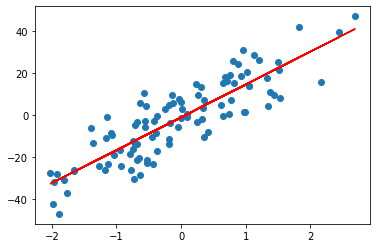

In [109]:
predictions_two = model(X, param_theta_final_two)

plt.scatter(x, y)
plt.plot(x, predictions, c='r')


In [110]:
# Le coût de notre modèle (but tendre vers 0)
cost_function(X, y, param_theta_final_two)

44.50715230922219

- On observe que nous avons de bien meilleur résultats et que notre modèle *fit* beaucoup mieux sur nos données

## Courbe d'apprentissage
affichons l'évolution de notre de fonction coût pour nos pramètres $\theta$ à chaque itération de la descente de gradient

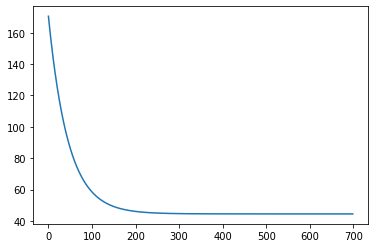

In [120]:
# range() le nombre d'itération réalisé
plt.plot(range(700), cost_history_two)

- On observe que nous aurions obtenue le même resultat avec 400 itérations

## Évaluation du modéle
### Coefficent de détermination, $R^2$
Méthode des *moindre carrés* qui montre, plus il est proche de 1, à quel point notre modèle rentre dans son nuage de points, donc la performance de notre modèle.  
$$R^2 = 1 - \frac{\sum(y - f(x))^2}{\sum (y - \overline y)^2}$$  


In [117]:
def coef_determination(y, pred):
    
    u = ((y - pred)**2).sum()   # Moyenne de nos érreurs
    v = ((y - y.mean())**2).sum() # Variance de nos érreurs
    
    return 1 - u/v

In [129]:
print("Le modèle fait :", coef_determination(y, predictions_two) * 100, "% de bonne prédictions")

Le modèle fait : 74.98055708683924 % de bonne prédictions
